In [11]:
import os
import pandas as pd
import numpy as np

In [12]:
####Collecting Dataset
dataset=pd.read_csv('Desktop/1429_1.csv')

In [14]:
dataset.head(3)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ


In [17]:
###Preprocessing data
#1.missing value computation
dataset.isna().sum()

id                          0
name                     6760
asins                       2
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews.date               39
reviews.dateAdded       10621
reviews.dateSeen            0
reviews.didPurchase     34659
reviews.doRecommend       594
reviews.id              34659
reviews.numHelpful        529
reviews.rating             33
reviews.sourceURLs          0
reviews.text                1
reviews.title               5
reviews.userCity        34660
reviews.userProvince    34660
reviews.username            2
dtype: int64

In [21]:
dataset['name']=dataset['name'].fillna(dataset['name'].mode()[0])

In [23]:
dataset['asins']=dataset['asins'].fillna(dataset['asins'].mode()[0])

In [56]:
dataset['reviews.date']=dataset['reviews.date'].fillna(dataset['reviews.date'].mode()[0])
dataset['reviews.dateAdded']=dataset['reviews.dateAdded'].fillna(dataset['reviews.dateAdded'].mode()[0])
dataset['reviews.didPurchase']=dataset['reviews.didPurchase'].fillna(dataset['reviews.didPurchase'].mode()[0])
dataset['reviews.doRecommend']=dataset['reviews.doRecommend'].fillna(dataset['reviews.doRecommend'].mode()[0])
dataset['reviews.id']=dataset['reviews.id'].fillna(dataset['reviews.id'].mean())
dataset['reviews.numHelpful']=dataset['reviews.numHelpful'].fillna(dataset['reviews.numHelpful'].mean())
dataset['reviews.rating']=dataset['reviews.rating'].fillna(dataset['reviews.rating'].median())
dataset['reviews.text']=dataset['reviews.text'].fillna(dataset['reviews.text'].mode()[0])
dataset['reviews.title']=dataset['reviews.title'].fillna(dataset['reviews.title'].mode()[0])
dataset['reviews.userCity']=dataset['reviews.userCity'].fillna(0)
dataset['reviews.userProvince']=dataset['reviews.userProvince'].fillna(0)
dataset['reviews.username']=dataset['reviews.username'].fillna(dataset['reviews.username'].mode()[0])

In [65]:
####Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['id']=le.fit_transform(dataset['name'])
dataset['name']=le.fit_transform(dataset['name'])
dataset['brand']=le.fit_transform(dataset['brand'])
dataset['categories']=le.fit_transform(dataset['categories'])
dataset['keys']=le.fit_transform(dataset['keys'])
dataset['reviews.dateSeen']=le.fit_transform(dataset['reviews.dateSeen'])
dataset['reviews.sourceURLs']=le.fit_transform(dataset['reviews.sourceURLs'])
dataset['asins']=le.fit_transform(dataset['asins'])
dataset['reviews.date']=le.fit_transform(dataset['reviews.date'])
dataset['reviews.dateAdded']=le.fit_transform(dataset['reviews.dateAdded'])
dataset['reviews.didPurchase']=le.fit_transform(dataset['reviews.didPurchase'])
dataset['reviews.doRecommend']=le.fit_transform(dataset['reviews.doRecommend'])
dataset['reviews.text']=le.fit_transform(dataset['reviews.text'])
dataset['reviews.title']=le.fit_transform(dataset['reviews.title'])
dataset['reviews.username']=le.fit_transform(dataset['reviews.username'])

In [66]:
dataset.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,0,0,35,0,21,4,Amazon,740,1907,726,...,1,111372787.0,0.0,5.0,10435,28846,11515,0.0,0.0,548
1,0,0,35,0,21,4,Amazon,740,1907,726,...,1,111372787.0,0.0,5.0,10436,33351,19613,0.0,0.0,26303
2,0,0,35,0,21,4,Amazon,740,1907,726,...,1,111372787.0,0.0,5.0,10436,17069,1739,0.0,0.0,4562
3,0,0,35,0,21,4,Amazon,740,1907,726,...,1,111372787.0,0.0,4.0,10436,16682,6135,0.0,0.0,16216
4,0,0,35,0,21,4,Amazon,739,1907,726,...,1,111372787.0,0.0,5.0,10436,10194,4318,0.0,0.0,21567


In [73]:
#2.Outlier treatment
Q1=dataset['brand'].quantile(0.25)
Q3=dataset['brand'].quantile(0.75)
IQR=Q3-Q1
dataset[~((dataset['name']<(Q1-1.5*IQR))|(dataset['name']>(Q3+1.5*IQR)))]
Q1=dataset['asins'].quantile(0.25)
Q3=dataset['asins'].quantile(0.75)
IQR=Q3-Q1
dataset[~((dataset['asins']<(Q1-1.5*IQR))|(dataset['asins']>(Q3+1.5*IQR)))]
Q1=dataset['categories'].quantile(0.25)
Q3=dataset['categories'].quantile(0.75)
IQR=Q3-Q1
dataset[~((dataset['categories']<(Q1-1.5*IQR))|(dataset['categories']>(Q3+1.5*IQR)))]
Q1=dataset['keys'].quantile(0.25)
Q3=dataset['keys'].quantile(0.75)
IQR=Q3-Q1
dataset[~((dataset['keys']<(Q1-1.5*IQR))|(dataset['keys']>(Q3+1.5*IQR)))]
Q1=dataset['reviews.date'].quantile(0.25)
Q3=dataset['reviews.date'].quantile(0.75)
IQR=Q3-Q1
dataset[~((dataset['reviews.date']<(Q1-1.5*IQR))|(dataset['reviews.date']>(Q3+1.5*IQR)))]
Q1=dataset['reviews.dateAdded'].quantile(0.25)
Q3=dataset['reviews.dateAdded'].quantile(0.75)
IQR=Q3-Q1
dataset[~((dataset['reviews.dateAdded']<(Q1-1.5*IQR))|(dataset['reviews.dateAdded']>(Q3+1.5*IQR)))]
Q1=dataset['reviews.dateSeen'].quantile(0.25)
Q3=dataset['reviews.dateSeen'].quantile(0.75)
IQR=Q3-Q1
dataset[~((dataset['reviews.dateSeen']<(Q1-1.5*IQR))|(dataset['reviews.dateSeen']>(Q3+1.5*IQR)))]
Q1=dataset['reviews.doRecommend'].quantile(0.25)
Q3=dataset['reviews.doRecommend'].quantile(0.75)
IQR=Q3-Q1
dataset[~((dataset['reviews.doRecommend']<(Q1-1.5*IQR))|(dataset['reviews.doRecommend']>(Q3+1.5*IQR)))]
Q1=dataset['reviews.id'].quantile(0.25)
Q3=dataset['reviews.id'].quantile(0.75)
IQR=Q3-Q1
dataset[~((dataset['reviews.id']<(Q1-1.5*IQR))|(dataset['reviews.id']>(Q3+1.5*IQR)))]
Q1=dataset['reviews.numHelpful'].quantile(0.25)
Q3=dataset['reviews.numHelpful'].quantile(0.75)
IQR=Q3-Q1
dataset[~((dataset['reviews.numHelpful']<(Q1-1.5*IQR))|(dataset['reviews.numHelpful']>(Q3+1.5*IQR)))]
Q1=dataset['reviews.rating'].quantile(0.25)
Q3=dataset['reviews.rating'].quantile(0.75)
IQR=Q3-Q1
dataset[~((dataset['reviews.rating']<(Q1-1.5*IQR))|(dataset['reviews.rating']>(Q3+1.5*IQR)))]
Q1=dataset['reviews.text'].quantile(0.25)
Q3=dataset['reviews.text'].quantile(0.75)
IQR=Q3-Q1
dataset[~((dataset['reviews.text']<(Q1-1.5*IQR))|(dataset['reviews.text']>(Q3+1.5*IQR)))]
Q1=dataset['reviews.title'].quantile(0.25)
Q3=dataset['reviews.title'].quantile(0.75)
IQR=Q3-Q1
dataset[~((dataset['reviews.title']<(Q1-1.5*IQR))|(dataset['reviews.title']>(Q3+1.5*IQR)))]
Q1=dataset['reviews.username'].quantile(0.25)
Q3=dataset['reviews.username'].quantile(0.75)
IQR=Q3-Q1
dataset[~((dataset['reviews.username']<(Q1-1.5*IQR))|(dataset['reviews.username']>(Q3+1.5*IQR)))]

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,0,0,35,0,21,4,Amazon,740,1907,726,...,1,111372787.0,0.000000,5.0,10435,28846,11515,0.0,0.0,548
1,0,0,35,0,21,4,Amazon,740,1907,726,...,1,111372787.0,0.000000,5.0,10436,33351,19613,0.0,0.0,26303
2,0,0,35,0,21,4,Amazon,740,1907,726,...,1,111372787.0,0.000000,5.0,10436,17069,1739,0.0,0.0,4562
3,0,0,35,0,21,4,Amazon,740,1907,726,...,1,111372787.0,0.000000,4.0,10436,16682,6135,0.0,0.0,16216
4,0,0,35,0,21,4,Amazon,739,1907,726,...,1,111372787.0,0.000000,5.0,10436,10194,4318,0.0,0.0,21567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,38,38,5,0,8,41,"Amazon Digital Services, Inc",17,1918,6,...,1,111372787.0,0.630248,3.0,11878,28080,13647,0.0,0.0,10039
34656,38,38,5,0,8,41,"Amazon Digital Services, Inc",26,1918,8,...,1,111372787.0,0.630248,1.0,11878,1101,15062,0.0,0.0,9008
34657,38,38,5,0,8,41,"Amazon Digital Services, Inc",22,1918,9,...,1,111372787.0,0.630248,1.0,11878,19299,3054,0.0,0.0,7772
34658,38,38,5,0,8,41,"Amazon Digital Services, Inc",23,1918,7,...,1,111372787.0,0.630248,1.0,11878,16121,13801,0.0,0.0,9259


In [102]:
###Clustering
x=dataset[['reviews.text','reviews.title','reviews.doRecommend','reviews.rating']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x[['reviews.text','reviews.title','reviews.doRecommend','reviews.rating']] = scaler.fit_transform(x[['reviews.text','reviews.title','reviews.doRecommend','reviews.rating']])

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [103]:
x.head()

,reviews.text,reviews.title,reviews.doRecommend,reviews.rating
0,1.151119,0.382904,0.20394,0.564359
1,1.601372,1.889070,0.20394,0.564359
2,-0.025936,-1.435356,0.20394,0.564359
3,-0.064615,-0.617734,0.20394,-0.795438
4,-0.713059,-0.955682,0.20394,0.564359


In [104]:
from sklearn.cluster import KMeans
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(x[['reviews.text','reviews.title','reviews.doRecommend','reviews.rating']])
    sse.append(km.inertia_)

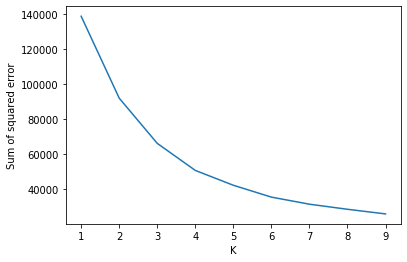

In [105]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [106]:
model = KMeans(n_clusters=3)
pred = model.fit_predict(x[['reviews.text','reviews.title','reviews.doRecommend','reviews.rating']])

In [107]:
dataset['cluster']= pred

In [108]:
dataset.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,cluster
0,0,0,35,0,21,4,Amazon,740,1907,726,...,111372787.0,0.0,5.0,10435,28846,11515,0.0,0.0,548,2
1,0,0,35,0,21,4,Amazon,740,1907,726,...,111372787.0,0.0,5.0,10436,33351,19613,0.0,0.0,26303,2
2,0,0,35,0,21,4,Amazon,740,1907,726,...,111372787.0,0.0,5.0,10436,17069,1739,0.0,0.0,4562,1
3,0,0,35,0,21,4,Amazon,740,1907,726,...,111372787.0,0.0,4.0,10436,16682,6135,0.0,0.0,16216,1
4,0,0,35,0,21,4,Amazon,739,1907,726,...,111372787.0,0.0,5.0,10436,10194,4318,0.0,0.0,21567,1


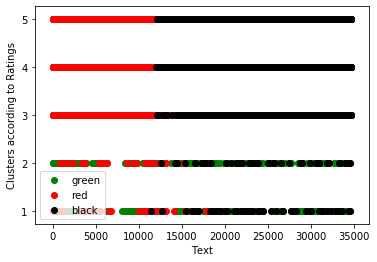

In [117]:
dataset1 = dataset[dataset.cluster==0]
dataset2 = dataset[dataset.cluster==1]
dataset3 = dataset[dataset.cluster==2]
plt.scatter(dataset1['reviews.text'],dataset1['reviews.rating'],color='green',label='green')##negative reviews
plt.scatter(dataset2['reviews.text'],dataset2['reviews.rating'],color='red',label='red')###Neutral Reviews
plt.scatter(dataset3['reviews.text'],dataset3['reviews.rating'],color='black',label='black')###Positive review
plt.xlabel('Text')
plt.ylabel('Clusters according to Ratings')
plt.legend()

In [118]:
dataset.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,cluster
0,0,0,35,0,21,4,Amazon,740,1907,726,...,111372787.0,0.0,5.0,10435,28846,11515,0.0,0.0,548,2
1,0,0,35,0,21,4,Amazon,740,1907,726,...,111372787.0,0.0,5.0,10436,33351,19613,0.0,0.0,26303,2
2,0,0,35,0,21,4,Amazon,740,1907,726,...,111372787.0,0.0,5.0,10436,17069,1739,0.0,0.0,4562,1
3,0,0,35,0,21,4,Amazon,740,1907,726,...,111372787.0,0.0,4.0,10436,16682,6135,0.0,0.0,16216,1
4,0,0,35,0,21,4,Amazon,739,1907,726,...,111372787.0,0.0,5.0,10436,10194,4318,0.0,0.0,21567,1


In [121]:
####Using supervised learning
x=dataset[['reviews.text']]
y=dataset[['reviews.rating']]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [124]:
from sklearn.metrics import accuracy_score
print("Accuracy score using Supervised Machine Learning Algorithm(Logistic Regression)is",accuracy_score(y_test,y_pred)*100)

Accuracy score using Supervised Machine Learning Algorithm(Logistic Regression)is 68.5420273129448


In [127]:
import pickle
file=open('models.pickle','wb')
pickle.dump(model,file)